In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
data = pd.read_csv('headbrain.csv')
data.head()


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [67]:
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values
print(data.shape)
print(x.shape)
print(y.shape)

(237, 4)
(237,)
(237,)


m = sum((x - mean(x))*(y-mean(y))/sum(x-mean(x))


after calculating m we can find c by placing values of mean(y), mean(x) and m in the equation


y = mx + c

In [68]:
mean_x = np.mean(x)
mean_y = np.mean(y)

n = len(x)

# calculating the values of m and c in formula y = mx + c
numer = 0
denom = 0
for i in range(n):
    numer+= (x[i]-mean_x)*(y[i]-mean_y)
    denom+= (x[i]-mean_x)**2
m = numer/denom
c = mean_y - (m*mean_x)
print(m,c)

0.26342933948939945 325.57342104944223


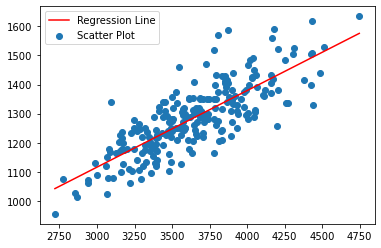

In [69]:
max_x = np.max(x) 
min_x = np.min(x) 

X = np.linspace(min_x,max_x,1000)
Y = m*X + c # Y is the predicted output 

plt.plot(X,Y,color='red',label='Regression Line')
plt.scatter(x,y,label='Scatter Plot')
plt.legend()
plt.show()

R^2 method to check the accuracy

Y is the predicted output
y is the actual output

R^2 = [sum(Y - mean(y))^2 / sum(Y - mean(y))^2]  

In [70]:
pred = 0
act = 0
for i in range(n):
    Y_pred = m*x[i] + c
    act += (y[i] - mean_y)**2
    pred += (mean_y - Y_pred)**2
r2 = (pred/act)
print(r2)

0.6393117199570001


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [72]:
x = x.reshape((n,1))
reg = LinearRegression()
reg = reg.fit(x,y)
Y = reg.predict(x)
print(reg.score(x,y))

0.639311719957
